# Постановка задачи

Пусть дана некоторая функция $f(x)$, нужно найти решение уравнения
$$f(x) = 0$$

- В отличие от случая линейного уравнения, нелинейное уравнение может иметь сколько угодно корней, в том числе и не иметь их вовсе.

- Чтобы как-то конкретизировать корень, требуется дополнительно указать отрезок локализации.

- Задача формулируется в следующем виде: найти решение уравнения
$$f(x) = 0,\quad x \in [a, b]$$

# Метод дихотомии

Простейший метод решения скалярного уравнения — метод деления отрезка пополам. Допустим, что функция $f(x)$ непрерывна и в концах отрезка $[a, b]$ принимает значения разного знака.

Таким образом, корень локализован на отрезке $[a, b]$. Разобьем его точкой $c = \frac{a + b}{2}$ на пару отрезков $[a, c]$ & $[c, b]$.  Пусть для определенности $f(a) > 0$, $f(b) < 0$

То есть возможны варианты
- $f(c) = 0$ -- корень найден
- $f(c) < 0$, тогда корень на отрезке $[a, c]$
- $f(c) > 0$, тогда корень на отрезке $[c, b]$

Таким образом, задача свелась к такой же, но с меньшим отрезком.

Рассмотрим в качестве примера функцию $f(x) = \tan\frac{x}{4} - 1$. Ее корни расположены в точках $x_k + (1 + 4k)\pi$. Допустим, мы хотим найти численно корень $x_0 = \pi$. Необходимо найти отрезок локализации этого корня, на концах которого функция принимает разные по знаку значения, например, отрезок$[3, 4]$.

In [1]:
import numpy as np

def bisect(f, a, b, eps=1e-6):
    fa = f(a); fb = f(b)
    while b - a > eps:
        c = (a + b) / 2
        fc = f(c)
        if fa * fc > 0: # If sign f(a) = sign f(c)
            a = c; fa = fc
        else:
            b = c; fb = fc
        print('[%12.10f, %12.10f]' % (a, b))
    return (a + b) / 2


def f(x): return np.tan(x / 4) - 1

bisect(f, 3, 4) - np.pi

[3.0000000000, 3.5000000000]
[3.0000000000, 3.2500000000]
[3.1250000000, 3.2500000000]
[3.1250000000, 3.1875000000]
[3.1250000000, 3.1562500000]
[3.1406250000, 3.1562500000]
[3.1406250000, 3.1484375000]
[3.1406250000, 3.1445312500]
[3.1406250000, 3.1425781250]
[3.1406250000, 3.1416015625]
[3.1411132812, 3.1416015625]
[3.1413574219, 3.1416015625]
[3.1414794922, 3.1416015625]
[3.1415405273, 3.1416015625]
[3.1415710449, 3.1416015625]
[3.1415863037, 3.1416015625]
[3.1415863037, 3.1415939331]
[3.1415901184, 3.1415939331]
[3.1415920258, 3.1415939331]
[3.1415920258, 3.1415929794]


-1.5099579897537296e-07

# Скорость сходимости дихотомии

- Сделав некоторое число делений отрезка пополам, можно получить хорошее приближение к решению уравнения. Поскольку длина отрезка на каждом шаге уменьшается в 2 раза.
$$b_n - a_n = 2^{-n}(b_0 - a_0)$$

- Корень уравнения расположен где-то на отрезке $[a_n, b_n]$, и можно написать
$$\left|x^* - \frac{a_n + b_n}{2}\right| < \frac{|b_n - a_n|}{2} = |b_0 - a_0|2^{-(n + 1)}$$

Метод сходится со скоростью геометрической прогрессии с показателем $q = \frac{1}{2}$.


# Метод простой итерации

Предположим, что уравнение $f(x) = 0$ удалось заменить эквивалентным ему уравнением $x = \phi(x)$. Рассмотрим итерационный процесс
$$x_{k + 1} = \phi(x_k)$$
Рассмотрим, при каких условиях этот процесс сходится.

# Теорема Банаха о сжимающем отображении
Если $\phi(x)$ задает сжимающее отображение, то есть существует $q \in [0, 1)$
$$\rho(\phi(x), \phi(y)) \leq q\rho(x, y)$$
то у отображения $\phi(x)$  существует единственная неподвижная точка $x^* = \phi(x^*)$
$$x^* = \lim_{k \to \infty}x_k$$
Пусть этот процесс сходится $x_k \to x^*$. Что можно сказать о скорости?
$$|x^* - x_k| \leq q^k|x^* - x_0|$$

Рассмотрим некоторый отрезок $[a, b]$
$$\rho(\phi(x), \phi(y)) = |\phi(x) - \phi(y)| \leq |\phi'(\xi)||x - y|$$
$$|\phi'(\xi)| \leq q < 1$$

# Достаточное условие сжимаемости
- $\phi(x)$ отображает отрезок $[a, b]$ в себя и имеет на нем производную по модулю меньше $q < 1$
$$\phi([a, b]) \in [a, b]$$
$$\max_{x \in [a, b]}|\phi'(x)| = q < 1$$
Тогда $\phi(x)$ задает на $[a, b]$ сжимающее отображение, а значит для нее итерационный процесс
$$x_{k + 1} = \phi(x_k)$$
сходится от любого начального приближения $x_0 \in [a, b]$ к неподвижной точке
$$x^* = \phi(x^*)$$

Если $|\phi'(x^*)| < 1$, то существует такая окрестность корня, где $\phi(x)$ задает сжимающее отображение. При необходимости можно измельчать отрезок $[a,b]$ дихотомией до выполнения первого условия.

# Метод релаксации

Рассмотрим $f(x):~f(a) < 0,~f(b) > 0,~f'(x) > 0$ на $[a, b]$. Построим $\phi(x)$ следующим образом
$$\phi(x) = x - \tau f(x),\quad \tau > 0$$
Тогда
$$\phi'(x) = 1 - \tau f'(x)$$
Если взять $\tau < \frac{1}{\max f'(x)}$, то $0 \leq \phi'(x) < 1$, монотонно растет, осображает отрезок в себя. Можно брать и другие значения шага, только сжимаемость требуется проверять непосредственно.

Рассмотрим уравнение
$$x = \ln(x + 2)$$

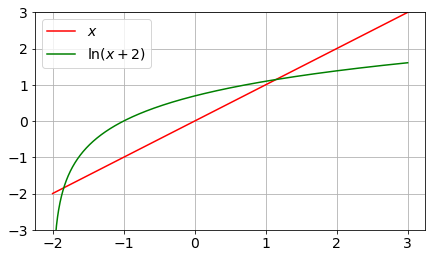

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', **{'size' : 14})
x = np.linspace(-2. + 0.001, 3, 1000);
plt.figure(figsize=(7,4))
plt.plot(x, x, 'r', label='$x$');
plt.plot(x, np.log(x + 2), 'g', label='$\ln(x+2)$');
plt.grid()
plt.legend(loc='upper left')
plt.ylim(-3, 3)
plt.show()

Из графиков видно, что один корень расположен в на отрезке $[1, 2]$, а второй — на отрезке $[−1.9,−1]$. Действительно,
$$x - \ln(x + 2)\mid_{x = 1} = 1 - \ln 3 < 1 - \ln e = 0$$
$$x - \ln(x + 2)\mid_{x = 2} = 2 - \ln 4 > 2 - \ln e^2 = 0$$
$$x - \ln(x + 2)\mid_{x = -1.9} = -1.9 - \ln 0.1 > -1.9 - \ln e^{-2} = 0.1 > 0$$
$$x - \ln(x + 2)\mid_{x = -1} = -1 - \ln 1 = -1 < 0$$

Возьмем итерационный процесс $x_{k + 1} = \phi(x_k)$. Это отображение переводит отрезок $[1, 2]$ внутрь себя:
$$1 < \ln 3 \leq \ln(x + 2) \leq \ln 4 < 2$$
Производная этого отображения равна
$$\phi'(x) = \frac{1}{x + 2},\quad q = \max_{x  \in [1, 2]}|\phi'(x)| = \frac{1}{3} < 1$$
Значит это сжимающее отображение на $[1, 2]$.

In [3]:
from scipy.optimize import fsolve

def phi(x):
    return np.log(x + 2)

x = 1.5
for i in range(10):
    x = phi(x)
    
[xtrue] = fsolve(lambda x: x - phi(x), 1.5, xtol=1e-20)
print('x =', x, ', x* =', xtrue)
print('x - x* =', x - xtrue)

x = 1.146196663796787 , x* = 1.1461932206205825
x - x* = 3.4431762045983305e-06


Попробуем применить то же отображение, но к другому корню

In [4]:
x0 = -1.84140
x = x0
for i in range(10):
    x = phi(x)
    
[xtrue] = fsolve(lambda x: x - phi(x), x0, xtol=1e-20)
print('x =', x, ', x* =', xtrue)
print('x - x* =', x - xtrue)

x = 1.0241369097163908 , x* = -1.8414056604369606
x - x* = 2.8655425701533517


Дело в том, что $\phi(x) = \ln(x + 2)$ не задает сжимающее отображение на $[-1.9, -1]$, это видно хотя бы из того, что
$$\phi'(x) = \frac{1}{|x + 2|} \geq 1$$

- Предложите другой способ записать решение уравнения $x = \ln(x + 2)$ в виде неподвижной точки некоторого итерационного процесса $x_{k  + 1} = \phi_1(x_k)$

Рассмотрим $\phi_1(x) = e^x - 2$ то отображение переводит отрезок $[-1.9, -1]$ в себя, а его производная
$$q = \max_{x \in [-1.9, -1]}|e^x| = e^{-1} < 1$$

In [5]:
def phi2(x):
    return np.exp(x) - 2

x0 = -1.45
x = x0
for i in range(10):
    x = phi2(x)
    
[xtrue] = fsolve(lambda x: x - phi2(x), x0, xtol=1e-20)
print('x =', x, ', x* =', xtrue)
print('x - x* =', x - xtrue)

x = -1.8414056553891305 , x* = -1.8414056604369606
x - x* = 5.047830153870336e-09


# Метод Ньютона

В основе метода Ньютона лежит замена нелинейного уравнения $f(x) = 0$ приближенным линейным уравнением. Разложим $f(x)$ в окресности точки $x_k$ в ряд Тейлора, отбросив все члены кроме первых двуx.
$$0 = f(x) \approx f(x_k) + f'(x_k)(x - x_k)$$
Линейное уравнение легко решается $x = x_k - (f'(x_k))^{-1}f(x_k)$. 

Возьмем это решение в качестве нового приближения к решению $f(x) = 0$

Запишем метод Ньютона в виде метода простой итерации
$$x_{k + 1} = \phi(x_k) = x_k - \frac{f(x_k)}{f'(x_k)}$$
$$phi'(x) = 1 - \frac{f'(x)}{f'(x)} + \frac{f(x)f''(x)}{(f'(x))^2} = \frac{f(x)f''(x)}{(f'(x))^2}$$
Видно, что в окрестности корня производная $\phi'(x)$ по модулю будет меньше единицы.

# Сходимость метода Ньютона

В отличие от ранее рассмотренных методов, метод Ньютона сходится квадратично (см учебники теорема Канторовича). Это значит что на каждой итерации точность не просто увеличивается, умножаясь на константу, а возводится в квадрат. Сравните линейную сходимость
$$|x^* - x_k| \leq q|x^* - x_{k - 1}|$$
и квадратичную
$$|x^* - x_k| \leq q|x^* - x_{k - 1}|^2$$

На практике квадратичная сходимость выражается в удвоении на каждом шаге количества правильных знаков. В случае линейной сходимости каждая итерация добавляла несколько правильных знаков.

Чтобы получить на практике квадратичную сходимость необходимо удовлетворить нескольким условиям из теоремы. Но, как правило, условиям теоремы удовлетворяет довольно малый отрезок $[a, b]$, и чтобы реально получить быструю сходимость требуется выбрать очень хорошее начальное приближение. Если нарушать условия теоремы, и выбрать плохое начальное приближение, возможна расходимость или не сходимость метода Ньютона.

In [6]:
def f(x):
    return np.tan(x / 4) - 1
def fprime(x):
    return 0.25 / np.cos(x / 4)**2

x = 1.
for i in range(1, 7):
    x = x - f(x) / fprime(x)
    print('x_%d - x^* = %e' % (i, x - np.pi))

x_1 - x^* = 6.547214e-01
x_2 - x^* = 1.178428e-01
x_3 - x^* = 3.538901e-03
x_4 - x^* = 3.132800e-06
x_5 - x^* = 2.453593e-12
x_6 - x^* = 0.000000e+00


Метод Ньютона нуждается в хорошем начальном приближении. Если начальное приближение задано неудачно, метод разойдется (причем тоже квадратично — ошибка будет на каждой итерации возводиться в квадрат). Метод также допускает наглядную интерпретацию:

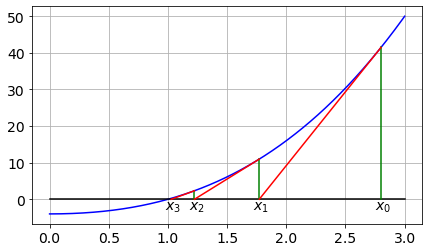

In [7]:
def f(x):
    return (x-1)*(x+2)**2
def fprime(x):
    return 3 * x * (x+2)

x0 = 2.8
x = [x0]
n = 3
for i in range(n):
    x.append(x[-1] - f(x[-1]) / fprime(x[-1]))
    
X = np.linspace(0, 3, 1000)
plt.figure(figsize=(7, 4))
plt.plot(X, f(X), 'b')
plt.plot(X, 0*X, 'k')
for i in range(n):
    plt.plot([x[i], x[i]], [0, f(x[i])], 'g')
for i in range(n+1):    
    plt.annotate('$x_{%d}$' % i, xy=(x[i]-0.05, -3))
for i in range(n):
    plt.plot([x[i], x[i+1]], [f(x[i]), 0], 'r')

plt.grid()

Если корень функции кратный, метод Ньютона метод Ньютона сходится медленее (линейно, а не квадратично)

In [9]:
def f(x):
    return (x-1)**2 * (x+2)
def fprime(x):
    return 3 * (x**2 - 1)

x = 3.
for i in range(1, 10):
    x = x - f(x) / fprime(x)
    print('x_%d - x^* = %e' % (i, x - 1))

x_1 - x^* = 1.166667e+00
x_2 - x^* = 6.549708e-01
x_3 - x^* = 3.544152e-01
x_4 - x^* = 1.860994e-01
x_5 - x^* = 9.569009e-02
x_6 - x^* = 4.857325e-02
x_7 - x^* = 2.447858e-02
x_8 - x^* = 1.228862e-02
x_9 - x^* = 6.156817e-03


# Метод секущих

В случаях, когда непосредственно нахождение производной функции $f(x)$ затруднительно, прибегают к методу секущих. В нем вместо точного значения производной используется разностное отношение
$$x_{k + 1} = x_k - \frac{x_k - x_{k - 1}}{f(x_k) - f(x_{k - 1})}f(x_k)$$
Метод позволяет сохранить квадратичную сходимость метода Ньютона, но может испытывать численные неустойчивости в окрестности корня. К тому же метод стал трехшаговым, то есть, и методу необходимо два начальных приближения $x_0$ и $x_1$.

# Системы уравнений
Будем рассматривать системы алгебраических уравнений
$$f(x) = 0$$
Система алгебраических уравнений может как иметь так и не иметь решений вне зависимости от соотношения между числом неизвестных
$n$ и уравнений $m$.

Требуется найти решение, локализованное в области $G \in \mathbb{R}^n$.

Теорема Банаха верна и в векторном случае, модуди заменяются на нормы, производная на норму якобиана

В методе Ньютона нужно будет обращать якобиан ($n = m$), что эквивалентно решению СЛАУ.
$$x_{k + 1} = x_k - J^{-1}(x_k)f(x_k)$$
- На что это похоже?
- Что можно сделать, чтобы расширить область сходимости?




In [11]:
def phi(x, y):
    return np.cos(y), np.sin(x)

x, y = 0.8, 0.8
for i in range(1, 91):
    x, y = phi(x, y)
    if i % 10 == 0: print('it =', i, 'x =', x, 'y =', y)

it = 10 x = 0.7675116305835011 y = 0.6925103358867228
it = 20 x = 0.768182766819452 y = 0.6948674205087247
it = 30 x = 0.7681688750294722 y = 0.6948187027689411
it = 40 x = 0.7681691625676978 y = 0.6948197111800425
it = 50 x = 0.7681691566161053 y = 0.6948196903075199
it = 60 x = 0.7681691567392941 y = 0.6948196907395485
it = 70 x = 0.7681691567367442 y = 0.6948196907306062
it = 80 x = 0.7681691567367971 y = 0.6948196907307913
it = 90 x = 0.768169156736796 y = 0.6948196907307875


In [10]:
def f(xy):
    x, y = xy
    return np.array([x - np.cos(y), y - np.sin(x)])
def jacf(xy):
    x, y = xy
    return np.array([[1, np.sin(y)], [-np.cos(x), 1]])

xy = np.array([0.5, 0.5])
for _ in range(5):
    dxy = np.linalg.solve(jacf(xy), f(xy))
    xy -= dxy
    print('x = %.14f y = %.14f' % tuple(xy), 'dx = % 6.2e dy = % 6.2e' % tuple(dxy))

x = 0.77270838674620 y = 0.71874966329392 dx = -2.73e-01 dy = -2.19e-01
x = 0.76831340773161 y = 0.69493015833692 dx =  4.39e-03 dy =  2.38e-02
x = 0.76816915677603 y = 0.69481969798874 dx =  1.44e-04 dy =  1.10e-04
x = 0.76816915673680 y = 0.69481969073079 dx =  3.92e-11 dy =  7.26e-09
x = 0.76816915673680 y = 0.69481969073079 dx = -4.87e-17 dy =  7.60e-17


# Приближение функций в смысле МНК
Пусть задана функция $f(x)$ и требуется построить ее наилучшее приближение вида
$$P_n(x) = c_0 + c_1x + \ldots + c_nx^n$$
Неизвестными являются $c_0, \ldots, c_n$. В каком смысле понимается наилучшее приближение? 

Например, по норме $L_2$:
$$E = \int_{[a, b]}|f(x) - P_n(x)|^2 dx \min_{\{c_i\}_{i = 1}^n}$$

$$E_{c_i}' = 2 \int_{[a, b]}\left(f(x) - \sum_kc_kx^k\right)x^idx = 2\left[(f, x^i) - \sum_kc_k(x^k, x^i)\right] = 0$$
Таким образом, задача сводится к решению системы
$$\Gamma c = g$$
$$\Gamma_{ij} = (x^i, x^j)$$
$$g_{i} = (f, x^i)$$

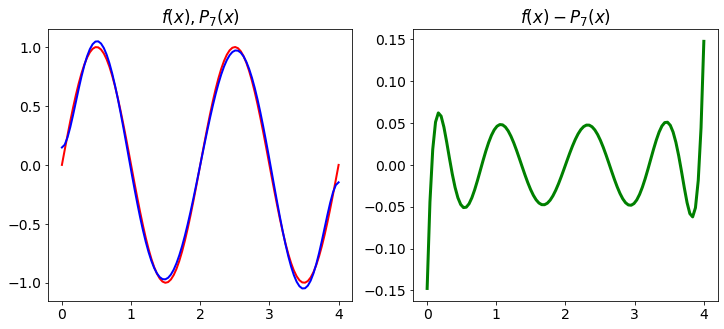

In [13]:
from scipy.integrate import quad
a = 0; b = 4; n = 8
def func(x): return np.sin(np.pi * x)
G = np.zeros((n, n))
g = np.zeros(n)
for i in range(n):
    for k in range(n):
        G[i, k], _ = quad(lambda x: x**(i+k), a, b)
    g[i], _ = quad(lambda x: x**i * func(x), a, b)

c = np.linalg.solve(G, g)
X = np.linspace(a, b, 100)
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(121)
ax.plot(X, func(X), 'r', lw=2)
ax.plot(X, np.array([c[i]*X**i for i in range(n)]).sum(axis=0), 'b', lw=2)
ax.set_title('$f(x), P_{%d}(x)$' % (n-1))
ax = fig.add_subplot(122)
ax.plot(X, func(X) - np.array([c[i]*X**i for i in range(n)]).sum(axis=0), 'g', lw=3)
ax.set_title('$f(x) - P_{%d}(x)$' % (n-1))
plt.show()

С точки зрения линейной алгебры нет разницы, по каким функциям раскладывать многочлен $P(x)$. Это могут быть $1, x, x^2, \ldots $ или же любое семейство многочленов. Однако, выбор базиса влияет на полученную линейную систему для определения коэффициентов разложения. Для определенности возьмем $[a, b] = [0, 1]$.
$$\Gamma_{ik} = \int_{[0, 1]}x^{i + k}dx = \frac{1}{i + k + 1}$$
Эта матрица называется матрицей Гильберта и является классическим примером плохо обусловленной матрицы

In [14]:
from scipy.linalg import hilbert, svdvals
def cond2(A):
    s = svdvals(A);
    return s[0] / s[-1]
for n in range(5, 31, 5):
    H = hilbert(n)
    print('n = %d, mu_2(H_n) = %e' % (n, cond2(H)))

n = 5, mu_2(H_n) = 4.766073e+05
n = 10, mu_2(H_n) = 1.602442e+13
n = 15, mu_2(H_n) = 3.674393e+17
n = 20, mu_2(H_n) = 1.355366e+18
n = 25, mu_2(H_n) = 1.371935e+18
n = 30, mu_2(H_n) = 5.507992e+18


Оказывается, можно выбрать такой базис из многочленов, что матрица $\Gamma$ будет диагональной! Такое семейство многочленов называется ортогональным.

Для отрезка $[a, b] = [-1, 1]$ ортогональными многочленами будут многочлены Лежандра.

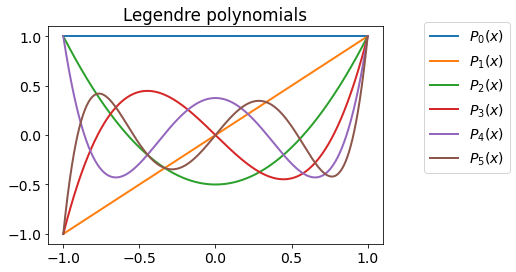

In [15]:
from scipy.special import legendre
x = np.linspace(-1, 1, 1000)
for k in range(6):
    plt.plot(x, legendre(k)(x), label='$P_{%d}(x)$' % k, lw=2)
plt.title('Legendre polynomials')
plt.ylim(-1.1, 1.1)
plt.legend(bbox_to_anchor=(1.4, 1.05))
plt.show()

Ортогональные мнгочлены существенно упрощают приближение функции в смысле МНК. В этом случае коэффициенты разложения находятся явно
$$c_k = \frac{(f, P_k)}{(P_k, P_k)}$$

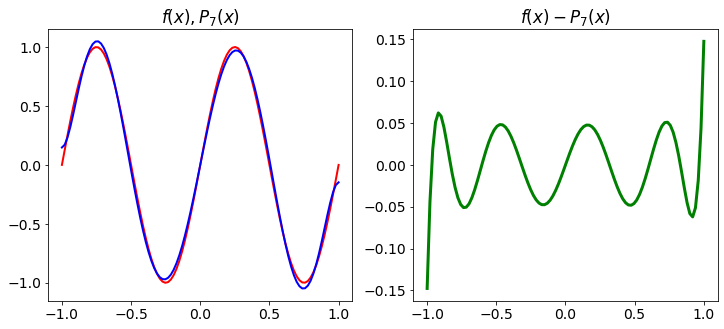

In [16]:
a = -1; b = 1; n = 8
def func(x): return np.sin(2 * np.pi * x)
g = np.zeros(n)
A = np.zeros(n)
for k in range(n):
    g[k], _ = quad(lambda x: legendre(k)(x) * func(x), a, b)
    A[k] = 2 / (2*k+1)
c = g / A
X = np.linspace(a, b, 100)
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(121)
ax.plot(X, func(X), 'r', lw=2)
ax.plot(X, np.array([c[i]*legendre(i)(X) for i in range(n)]).sum(axis=0), 'b', lw=2)
ax.set_title('$f(x), P_{%d}(x)$' % (n-1))
ax = fig.add_subplot(122)
ax.plot(X, func(X) - np.array([c[i]*legendre(i)(X) for i in range(n)]).sum(axis=0), 'g', lw=3)
ax.set_title('$f(x) - P_{%d}(x)$' % (n-1))
plt.show()

Минимизация ошибки в норме $L_2$ имеет существенный недостаток — максимальное отклонение сосредоточено у краев отрезка, а не рассредоточено равномерно по отрезку.

Данного недостатка лишено приближение в норме
$$(f, g) = \int_{[a, b]}\frac{f(x)g(x)}{\sqrt{(x - a)(b - x)}}$$
Для данной нормы соответствующим ортогональным семейством будут многочлены Чебышева.

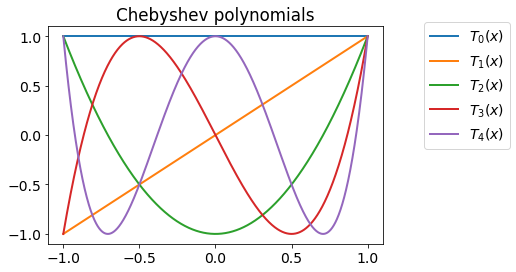

In [17]:
from scipy.special import chebyt
x = np.linspace(-1, 1, 1000)
for k in range(5):
    plt.plot(x, chebyt(k)(x), label='$T_{%d}(x)$' % k, lw=2)
plt.title('Chebyshev polynomials')
plt.legend(bbox_to_anchor=(1.4, 1.05))
plt.ylim(-1.1, 1.1)
plt.show()

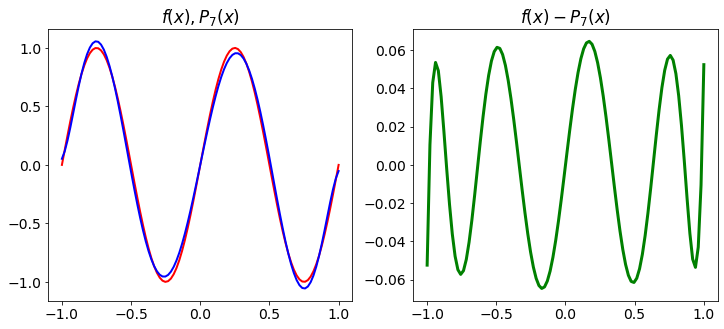

In [18]:
a = -1; b = 1; n = 8
def func(x): return np.sin(2 * np.pi * x)
g = np.zeros(n)
A = np.zeros(n)
for k in range(n):
    g[k], _ = quad(lambda x: chebyt(k)(x) * func(x) / np.sqrt(1 - x**2), a, b)
    A[k] = np.pi / 2 if k > 0 else np.pi
c = g / A
X = np.linspace(a, b, 100)
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(121)
ax.plot(X, func(X), 'r', lw=2)
ax.plot(X, np.array([c[i]*chebyt(i)(X) for i in range(n)]).sum(axis=0), 'b', lw=2)
ax.set_title('$f(x), P_{%d}(x)$' % (n-1))
ax = fig.add_subplot(122)
ax.plot(X, func(X) - np.array([c[i]*chebyt(i)(X) for i in range(n)]).sum(axis=0), 'g', lw=3)
ax.set_title('$f(x) - P_{%d}(x)$' % (n-1))
plt.show()